In [191]:
import numpy  as  np
import tensorflow  as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from os import listdir
from os.path import isfile, join
import re

from random import randint
import datetime

In [192]:
quotes_data  = pd.read_csv("quotes_all.csv",delimiter=';')

In [193]:
quotes_data.head()

,Quote,Author,Topic
0,Age is an issue of mind over matter. If you do...,Mark Twain,age
1,"Anyone who stops learning is old, whether at t...",Henry Ford,age
2,Wrinkles should merely indicate where smiles h...,Mark Twain,age
3,True terror is to wake up one morning and disc...,Kurt Vonnegut,age
4,A diplomat is a man who always remembers a wom...,Robert Frost,age


In [194]:
quotes_data['Topic'].unique()

array(['age', 'alone', 'amazing', 'anger', 'anniversary', 'architecture',
       'art', 'attitude', 'beauty', 'best', 'birthday', 'business', 'car',
       'change', 'communication', 'computers', 'cool', 'courage', 'dad',
       'dating', 'death', 'design', 'diet', 'dreams', 'education',
       'environmental', 'equality', 'experience', 'failure', 'faith',
       'family', 'famous', 'fear', 'finance', 'fitness', 'food',
       'forgiveness', 'freedom', 'friendship', 'funny', 'future',
       'gardening', 'god', 'good', 'government', 'graduation', 'great',
       'happiness', 'health', 'history', 'home', 'hope', 'humor',
       'imagination', 'inspirational', 'intelligence', 'jealousy',
       'knowledge', 'leadership', 'learning', 'legal', 'life', 'love',
       'marriage', 'medical', 'men', 'mom', 'money', 'morning',
       'motivational', 'movies', 'movingon', 'music', 'nature',
       'parenting', 'patience', 'patriotism', 'peace', 'pet', 'poetry',
       'politics', 'positive', 'po

What is the distribution of Quotes over the topics?

In [195]:
quotes_data['Topic'].unique().size

117

In [196]:
topic_counts = []
for topic in quotes_data['Topic'].unique():
    topic_counts.append(sum(quotes_data['Topic']==topic))

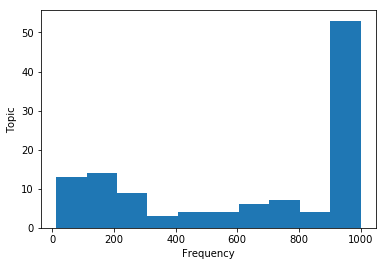

In [197]:
plt.hist(topic_counts)
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.show()

In [198]:
labels_encode={}
labels_decode={}
for i, topic in enumerate(quotes_data['Topic'].unique()):
    labels_encode[topic] = i
    labels_decode[i] = topic

In [199]:
# print(labels_encode, labels_decode)

In [200]:
less_topic = []
for i,count in enumerate(topic_counts):
    if count < 900:
            less_count.append(count)
            less_topic.append(labels_decode[i])
            print(labels_decode[i], count)
            
            
len(less_topic)

anger 329
anniversary 70
architecture 287
attitude 493
birthday 178
car 762
communication 282
computers 266
cool 886
courage 614
dating 191
design 445
diet 259
dreams 799
environmental 241
equality 279
failure 710
famous 700
finance 179
fitness 172
forgiveness 153
friendship 435
gardening 87
graduation 110
humor 539
imagination 700
inspirational 169
intelligence 618
jealousy 106
leadership 562
legal 352
medical 299
morning 880
motivational 111
movingon 76
parenting 146
patience 231
patriotism 154
pet 165
poetry 874
positive 627
romantic 417
sad 578
smile 326
sports 730
strength 735
sympathy 175
teacher 544
technology 886
teen 150
thankful 150
travel 639
trust 802
wedding 179
wisdom 727
christmas 283
easter 41
fathersday 15
memorialday 29
mothersday 24
newyears 36
saintpatricksday 12
thanksgiving 59
valentinesday 42


64

In [201]:
counter = 0
topic_counter = 0
for i,count in enumerate(topic_counts):
    if count > 900:
            print(labels_decode[i], count)
            counter+=count
            topic_counter+=1

print(counter, topic_counter)

age 998
alone 999
amazing 959
art 1000
beauty 972
best 999
business 1000
change 994
dad 1000
death 1000
education 998
experience 999
faith 999
family 999
fear 1000
food 997
freedom 996
funny 999
future 999
god 997
good 998
government 1000
great 998
happiness 999
health 999
history 1000
home 1000
hope 999
knowledge 998
learning 990
life 997
love 997
marriage 998
men 995
mom 998
money 1000
movies 1000
music 999
nature 1000
peace 999
politics 1000
power 999
relationship 999
religion 1000
respect 998
science 1000
society 998
success 996
time 996
truth 1000
war 1000
women 998
work 999
52851 53


Removing some topics from DF:

In [202]:
for topic in less_topic:
    quotes_data = quotes_data[quotes_data.Topic !=topic]

In [232]:
quotes_data = quotes_data.reset_index(drop=True)

In [242]:
quotes_data.iloc[52850]

Quote     I was interested by the idea that artists work...
Author                                         Tom Stoppard
Topic                                                  work
Name: 52850, dtype: object

In [309]:
quotes_data['Topic'].unique().size

53

### Data Preprocess using Word2Vec

In [243]:
wordsList  = np.load('wordsList.npy')
wordsList = wordsList.tolist() 
wordsList = [word.decode('UTF-8') for word in wordsList] 
wordVectors = np.load('wordVectors.npy')

In [244]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [245]:
print(wordsList.index('years'))

82


In [246]:
numWords = []
for quote in quotes_data['Quote']:
    counter = 0
    for word in quote:
        counter+=1
    numWords.append(counter)

In [247]:
sum(numWords), max(numWords), min(numWords), sum(numWords)/len(numWords)

(7406976, 505, 12, 140.14826587954818)

In [248]:
quotes_data.shape[0]

52851

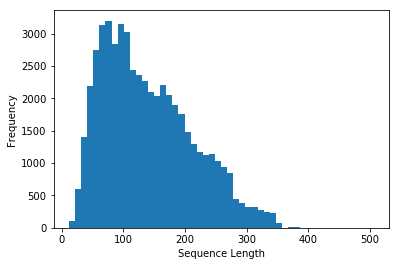

In [249]:
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [250]:
maxSeqLength = 200

In [251]:
strip_special_chars  = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [252]:
# ids = np.zeros((quotes_data.shape[0], maxSeqLength), dtype='int32')

# fileCounter = 0

# id_check = []

# for quote in quotes_data['Quote']:
#     cleanedLine = cleanSentences(quote)
#     split = cleanedLine.split()
#     indexCounter = 0
#     for word in split:
#         try:
#             ids[fileCounter][indexCounter] = wordsList.index(word)
#             id_check.append(word)
#         except ValueError:
#             ids[fileCounter][indexCounter] = 399999 #Vector for unknown words
#             id_check.append(399999)
#         indexCounter = indexCounter + 1
#         if indexCounter >= maxSeqLength:
#             break
#     fileCounter = fileCounter + 1
#     print(fileCounter)
# np.save('idsMatrix2', ids)

ids = np.load('idsMatrix2.npy')

In [253]:
ids.shape

(52851, 200)

## Labels

In [254]:
labels_encode={}
labels_decode={}
for i, topic in enumerate(quotes_data['Topic'].unique()):
    labels_encode[topic] = i
    labels_decode[i] = topic

First we randomly shuffle our dataframe:

In [255]:
quotes_data_shuffle = quotes_data.sample(frac=1)
quotes_data_shuffle.head()

,Quote,Author,Topic
42386,My parents had this relationship that was real...,Augusten Burroughs,relationship
388,"In the age of the individual's liquidation, th...",Theodor Adorno,age
16807,"That happens every time I get behind a guitar,...",Ben Harper,freedom
3191,"I think in art, but especially in films, peopl...",Jim Morrison,art
10559,The government has convinced parents that at s...,Rick Santorum,education


Store the labels:

In [299]:
labels_y = []
for topic in quotes_data_shuffle['Topic']:
    labels_y.append(labels_encode[topic])

In [300]:
print(labels_y[:100])

[42, 0, 16, 3, 10, 19, 5, 48, 44, 23, 7, 18, 27, 41, 9, 9, 37, 47, 39, 20, 34, 52, 17, 2, 44, 15, 46, 22, 6, 38, 26, 0, 1, 47, 17, 18, 36, 15, 20, 26, 32, 10, 19, 28, 21, 36, 6, 38, 48, 39, 29, 30, 9, 50, 43, 36, 47, 24, 34, 10, 51, 37, 49, 46, 49, 40, 52, 34, 52, 28, 52, 32, 2, 22, 17, 41, 32, 44, 15, 13, 45, 14, 22, 40, 40, 16, 48, 33, 37, 5, 39, 52, 3, 2, 42, 51, 30, 17, 32, 16]


In [301]:
len(labels_y)

52851

In [259]:
indices = np.asarray(quotes_data_shuffle.index)
print(indices[0:100])

[42386   388 16807  3191 10559 18952  5754 48636 44844 23784  7801 18781
 27343 41241  9911  9134 37475 47339 38996 19977 34615 52579 17404  2543
 43922 15808 46164 22274  6173 38846 26394   420  1457 47254 17744 18595
 35969 15418 20114 26543 32314 10528 18953 27979 21342 35961  6860 38223
 47891 39801 29695 30036  9692 50767 42917 36362 47089 23969 34248  9990
 51331 37494 49176 46522 49360 40853 52492 34320 52262 28316 52034 32027
  2393 22176 17431 41224 32114 44419 15533 12974 44976 14034 22293 39981
 40269 15920 48705 32918 37109  5846 38878 51905  3014  2577 42630 51025
 29886 17886 32553 16759]


In [335]:
indices[0], labels_y[0]
ids[indices[0]][:100]

array([   192,   1108,     40,     37,   1483,     12,     15,    588,
        18590,     41,   1702, 201534,    505,      3,   8936,     12,
           39,     40,      5, 201534,    505,      3,   2183,   2442,
          192,    808,     54,    960,     60,    192,    629,   5203,
            5,     41,    269,     41,     15,   2571,      4,   3063,
           13,    458,     12,     35,   4129,      5,  19650,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0], dtype=int32)

In [295]:
quote = quotes_data_shuffle.loc[400]['Quote']
print(quote)


cleanedLine = cleanSentences(quote)
split = cleanedLine.split()
print(split)

print([wordsList.index(word) for word in split])
ids[400][:50]    

Children also have artistic ability, and there is wisdom in there having it! The more helpless they are, the more instructive are the examples they furnish us and they must be preserved free of corruption from an early age.
['children', 'also', 'have', 'artistic', 'ability', 'and', 'there', 'is', 'wisdom', 'in', 'there', 'having', 'it', 'the', 'more', 'helpless', 'they', 'are', 'the', 'more', 'instructive', 'are', 'the', 'examples', 'they', 'furnish', 'us', 'and', 'they', 'must', 'be', 'preserved', 'free', 'of', 'corruption', 'from', 'an', 'early', 'age']
[271, 52, 33, 5292, 1657, 5, 63, 14, 7151, 6, 63, 518, 20, 201534, 56, 18712, 39, 32, 201534, 56, 37992, 32, 201534, 4103, 39, 31954, 95, 5, 39, 390, 30, 6729, 415, 3, 1834, 25, 29, 199, 464]


array([   271,     52,     33,   5292,   1657,      5,     63,     14,
         7151,      6,     63,    518,     20, 201534,     56,  18712,
           39,     32, 201534,     56,  37992,     32, 201534,   4103,
           39,  31954,     95,      5,     39,    390,     30,   6729,
          415,      3,   1834,     25,     29,    199,    464,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0], dtype=int32)

## Recurrent Neural Network

In [310]:
batchSize = 24
lstmUnits = 64
numClasses = quotes_data['Topic'].unique().size
iterations = 100000
numDimensions = 300

In [311]:
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [312]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

In [313]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [315]:
value  = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))

prediction = (tf.matmul(last, weight) + bias)

In [316]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [317]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [318]:
tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
with tf.Session() as sess:
    writer = tf.summary.FileWriter(logdir, sess.graph)

In [346]:
labels_y[400]
b = np.zeros(numClasses)
b.shape
b[labels_y[400]] = 1
b

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [351]:
def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(0,int((4*len(labels_y))/5))
        
        b = np.zeros(numClasses)
        b[labels_y[num]] = 1
        labels.append(b)
        
        arr[i] = ids[indices[num]]
        
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(int((4*len(labels_y))/5),len(labels_y))
        
        b = np.zeros(numClasses)
        b[labels_y[num]] = 1
        labels.append(b)
        
        arr[i] = ids[indices[num]]
        
    return arr, labels

In [352]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
    if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)
    
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)

writer.close()

KeyboardInterrupt: 

## Unknown word frequency

In [296]:
# compute how many times an unknown word has occured

num_39 = 0
id_39 = []

for i, val in enumerate(ids.max(1)):
    if val == 399999:
        num_39+=1
        id_39.append(i)

In [297]:
sum(numWords), num_39

(7406976, 4009)